In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#import data
exercise_data = pd.read_excel('C:/Users/ckalib.nelson/Desktop/export/apple_health_export/Raw Avg Health Data.xlsx')

In [3]:
#see 2019 results of exercrise data
exercise_data

,Month,Avg. Energy Burned per Day (kcal),Avg. Exercise Time per Day (minutes)
0,Jan,468.265581,37.354839
1,Feb,509.757143,43.750000
2,Mar,488.990806,43.096774
3,Apr,555.573600,52.800000
4,May,501.381935,47.612903
5,Jun,555.274133,50.833333
6,Jul,571.587097,57.645161
7,Aug,514.265033,48.233333
8,Sep,451.952633,38.033333
9,Oct,491.932387,36.000000


In [4]:
#view the dataset size
exercise_data.size

36

In [5]:
#view the shape of the dataset
exercise_data.shape

(12, 3)

In [6]:
#columns
exercise_data.columns

Index(['Month', 'Avg. Energy Burned per Day (kcal)',
       'Avg. Exercise Time per Day (minutes)'],
      dtype='object')

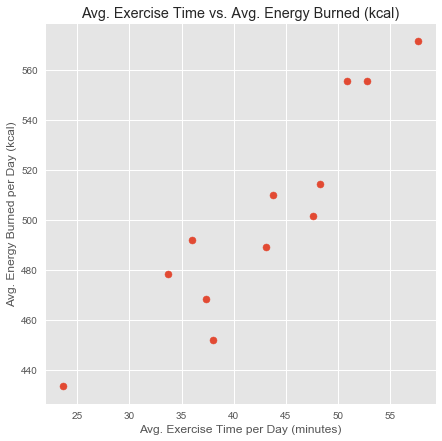

In [7]:
#plot scatter plot
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(exercise_data['Avg. Exercise Time per Day (minutes)'],exercise_data['Avg. Energy Burned per Day (kcal)'])
plt.title('Avg. Exercise Time vs. Avg. Energy Burned (kcal)')
plt.ylabel('Avg. Energy Burned per Day (kcal)')
plt.xlabel('Avg. Exercise Time per Day (minutes)')
plt.show()

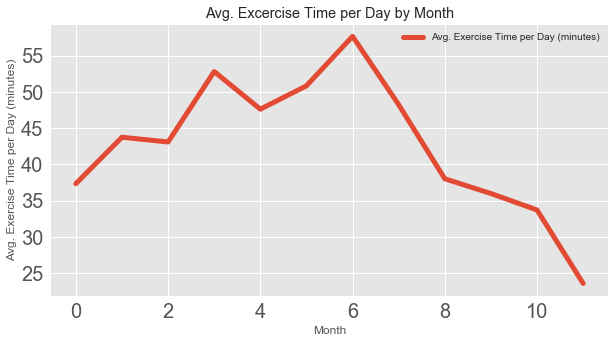

In [8]:
#plot time series of Avg. Exercsie Time per Day (minutes) in 2019
exercise_data[['Avg. Exercise Time per Day (minutes)']].plot(figsize=(10,5), linewidth = 5, fontsize=20)
plt.ylabel('Avg. Exercise Time per Day (minutes)')
plt.xlabel('Month #')
plt.xlabel('Month')
plt.title('Avg. Excercise Time per Day by Month');

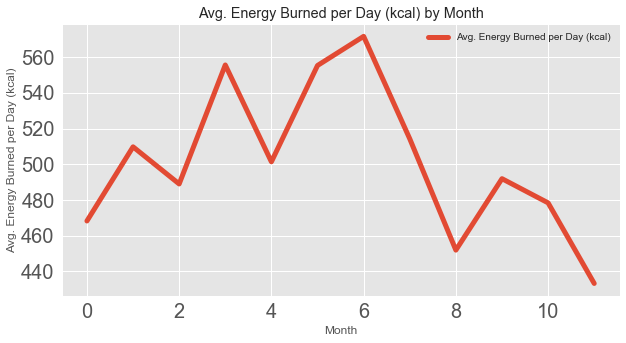

In [9]:
#plot time series of Avg. Energy Burned per Day (kcal) in 2019
exercise_data[['Avg. Energy Burned per Day (kcal)']].plot(figsize=(10,5), linewidth = 5, fontsize=20)
plt.ylabel('Avg. Energy Burned per Day (kcal)')
plt.xlabel('Month #')
plt.xlabel('Month')
plt.title('Avg. Energy Burned per Day (kcal) by Month');

In [10]:
#assign features on X axis
x_features = exercise_data[['Avg. Exercise Time per Day (minutes)']]

# assign target on Y axis
y_target = exercise_data[['Avg. Energy Burned per Day (kcal)']]

In [11]:
#import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [12]:
#fit data into the estimator
lineReg.fit(x_features,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#train model split the whole dataset into train and test datasets
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_features,y_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
#print shapes of the training and testing data sets
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9, 1) (3, 1) (9, 1) (3, 1)


In [15]:
#fit the training sets into the model
lineReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#print the intercept and coefficients
print (lineReg.intercept_)
print (lineReg.coef_)

#linear regression equation: y = b(intercept)0+ b1(input features)*x(coefficient of x)
# y = 304 + 5x

[304.24931461]
[[4.59600427]]


In [17]:
#prediction
y_pred = lineReg.predict(x_test)
y_pred

array([[505.32450163],
       [525.92992079],
       [412.77431878]])

In [18]:
#import required libraries for calculating MSE (mean square error)
import numpy as np
from sklearn import metrics

#calculate the mean square error (MSE)
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

13.869658488468431


In [19]:
#calculate variance
print ('variance score is %.2f' % lineReg.score(x_test,y_test))

variance score is 0.86
